In [ ]:
!pip install git+https://github.com/vincent-noel/pyMaBoSS.git@feat/uppmaboss_nodes_tables
!python -m maboss_setup
import os
os.environ["PATH"] += ":/usr/local/share/colomoto/bin/"

In [1]:
import maboss, time

When running the notebook locally, prefix should be "", otherwise it's the url of the folder from github.

In [2]:
# prefix = ""
prefix = "https://raw.githubusercontent.com/vincent-noel/TregModel/master/"

## Simulation of TCR2 activation + TGFB

In [3]:
t0 = time.time()
upp_actr2_tgfb = maboss.UpdatePopulation(
    maboss.load(
        prefix+"TregModel_InitPop.bnd",
        prefix+"TregModel_InitPop_ActTCR2_TGFB.cfg",
    ),
    prefix+"TregModel_InitPop.upp"
)

upp_actr2_tgfb_result = upp_actr2_tgfb.run(workdir="TregModel_InitPop_TGFB")

serie_actr2_tgfb = upp_actr2_tgfb_result.get_population_ratios()
serie_actr2_tgfb.name = "TCR2 activation + TGFB"

print("Simulation done in %.2fs" % (time.time()-t0))

Simulation done in 0.58s


In [4]:
t0 = time.time()
spd_actr2_tgfb = upp_actr2_tgfb_result.get_stepwise_probability_distribution(nb_cores=6)
print("States table computed in %.2fs" % (time.time()-t0))

States table computed in 981.06s


# Counting cell types

Here we need to have the nodes required as active, and the nodes required as inactive

In [5]:
cell_types = [
     (["CD25", "Proliferation"], ["FOXP3"]),
     (["FOXP3", "CD25", "Proliferation"], []),
     (["FOXP3", "Proliferation"], ["CD25"]),
     (["CD25"], ["FOXP3", "Proliferation"]),
     (["FOXP3", "CD25"], ["Proliferation"]),
     (["FOXP3"], ["CD25", "Proliferation"]),
]

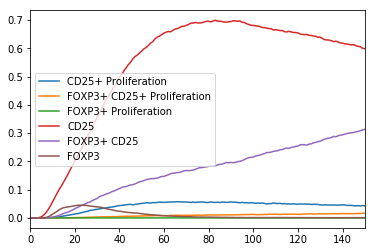

In [6]:
for (cell_type, anti_cell_type) in cell_types:
    (upp_actr2_tgfb_result
        .get_stepwise_probability_distribution(include=cell_type, exclude=anti_cell_type)
        .sum(axis=1)
        .plot(label="+ ".join(cell_type), legend=True))